<h1><center>Basic Stats and Data Exploration using Python</center></h1>

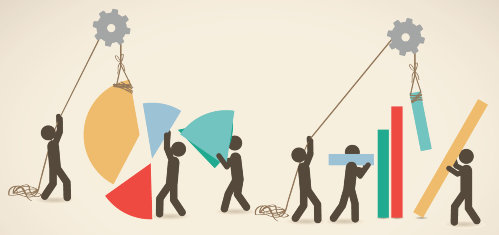

## Import necessary libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
sns.set_palette("husl")

## Read the file into a dataframe

In [101]:
df = pd.read_csv("./matches.csv", low_memory=False)

## Examining the dataset

In [102]:
df.shape

(636, 18)

In [103]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Indexing the data frame

In [104]:
# Select a specific row
df.iloc[3]

id                                       4
season                                2017
city                                Indore
date                            2017-04-08
team1              Rising Pune Supergiants
team2                      Kings XI Punjab
toss_winner                Kings XI Punjab
toss_decision                        field
result                              normal
dl_applied                               0
winner                     Kings XI Punjab
win_by_runs                              0
win_by_wickets                           6
player_of_match                 GJ Maxwell
venue               Holkar Cricket Stadium
umpire1                       AK Chaudhary
umpire2                      C Shamshuddin
umpire3                                NaN
Name: 3, dtype: object

### Select some rows by index

In [105]:
df.iloc[10:12]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN


### Select some rows and some columns

In [106]:
df.iloc[10:15, 2:4]

,city,date
10,Kolkata,2017-04-13
11,Bangalore,2017-04-14
12,Rajkot,2017-04-14
13,Kolkata,2017-04-15
14,Delhi,2017-04-15


### Select some columns by name

In [107]:
df[['city', 'date']][:10]

,city,date
0,Hyderabad,2017-04-05
1,Pune,2017-04-06
2,Rajkot,2017-04-07
3,Indore,2017-04-08
4,Bangalore,2017-04-08
5,Hyderabad,2017-04-09
6,Mumbai,2017-04-09
7,Indore,2017-04-10
8,Pune,2017-04-11
9,Mumbai,2017-04-12


## Filter Data

### Store all win by runs in a separate dataframe

In [108]:
runDF = df[df['win_by_runs']>0]
runDF.shape

(287, 18)

### Store all win by wickets in a separate dataframe

In [109]:
wktDF = df[df['win_by_wickets']>0]
wktDF.shape

(339, 18)

## Data Exploration

In [110]:
runDF['win_by_runs'].describe()

count    287.000000
mean      30.320557
std       27.621474
min        1.000000
25%       11.000000
50%       22.000000
75%       39.000000
max      146.000000
Name: win_by_runs, dtype: float64

### Histogram of win by runs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e32f90>]], dtype=object)

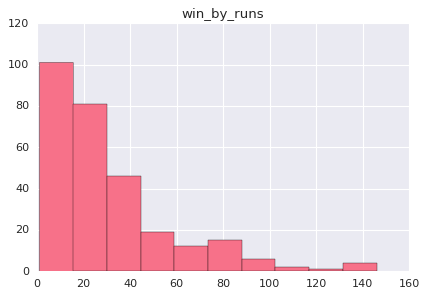

In [111]:
runDF.hist('win_by_runs')

### Boxplot of win by runs

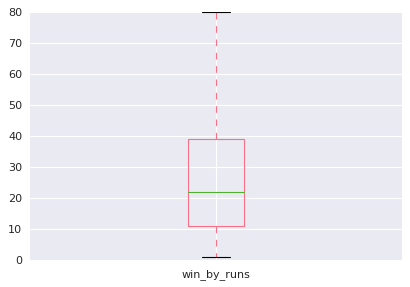

In [112]:
runDF.boxplot('win_by_runs', sym='')

## Counting Frequency

In [113]:
runDF['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [114]:
wktDF['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

### Plotting Freq counts

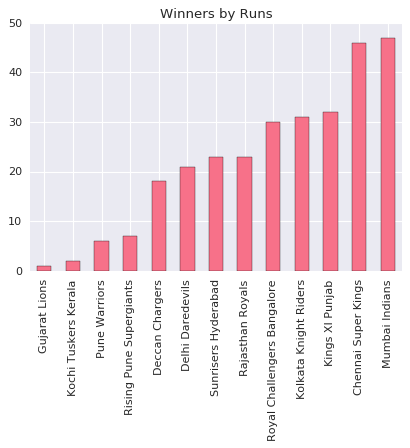

In [115]:
fig, ax = plt.subplots()
runDF['winner'].value_counts().sort_values().plot(ax=ax, kind='bar', title='Winners by Runs')
plt.show()

## Average

### Average win-by-runs

In [116]:
runDF['win_by_runs'].describe()

count    287.000000
mean      30.320557
std       27.621474
min        1.000000
25%       11.000000
50%       22.000000
75%       39.000000
max      146.000000
Name: win_by_runs, dtype: float64

In [117]:
print ('Mean: %.2f' % runDF['win_by_runs'].mean())

Mean: 30.32


In [118]:
print ('Median: %.2f' % runDF['win_by_runs'].median())

Median: 22.00


### Let's define a function to calculate mean

In [119]:
def calcMean(x):
    return x.sum()*1.0/x.count()

In [120]:
calcMean(runDF['win_by_runs'])

30.320557491289197

In [121]:
runDF.groupby('winner')['win_by_runs'].mean()

winner
Chennai Super Kings            34.500000
Deccan Chargers                23.388889
Delhi Daredevils               27.190476
Gujarat Lions                   1.000000
Kings XI Punjab                26.937500
Kochi Tuskers Kerala           11.500000
Kolkata Knight Riders          28.935484
Mumbai Indians                 32.595745
Pune Warriors                  23.166667
Rajasthan Royals               35.695652
Rising Pune Supergiants        25.142857
Royal Challengers Bangalore    39.866667
Sunrisers Hyderabad            20.695652
Name: win_by_runs, dtype: float64

## Crosstab - Great utility to view categorical data

### Do certain teams win more in some cities

In [124]:
pd.crosstab(df['city'], df['winner'])

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
city,,,,,,,,,,,,,
Abu Dhabi,1,0,0,0,2,0,1,0,0,3,0,0,0
Ahmedabad,0,0,1,0,1,0,0,1,0,7,0,1,1
Bangalore,4,1,3,1,5,0,6,8,0,3,1,30,2
Bloemfontein,0,0,1,0,1,0,0,0,0,0,0,0,0
Cape Town,0,2,1,0,1,0,0,1,0,1,0,1,0
Centurion,2,2,2,0,0,0,1,1,0,2,0,2,0
Chandigarh,3,0,1,2,22,0,3,4,1,3,0,3,4
Chennai,33,2,2,0,2,0,2,3,1,1,0,2,0
Cuttack,0,3,0,0,1,0,3,0,0,0,0,0,0


### Let's get the best city for each team

In [127]:
df.groupby(['winner'])['city'].agg(lambda x:x.value_counts().index[0])

winner
Chennai Super Kings               Chennai
Deccan Chargers                   Cuttack
Delhi Daredevils                    Delhi
Gujarat Lions                      Rajkot
Kings XI Punjab                Chandigarh
Kochi Tuskers Kerala                Kochi
Kolkata Knight Riders             Kolkata
Mumbai Indians                     Mumbai
Pune Warriors                        Pune
Rajasthan Royals                   Jaipur
Rising Pune Supergiants              Pune
Royal Challengers Bangalore     Bangalore
Sunrisers Hyderabad             Hyderabad
Name: city, dtype: object

### How many matches did they win in their best city

In [125]:
df.groupby(['winner'])['city'].agg(lambda x:x.value_counts().index[0] + " -> " + 
                                   str(x.value_counts().values[0]) + 
                                   " out of " + str(x.count()))

winner
Chennai Super Kings               Chennai -> 33 out of 77
Deccan Chargers                    Cuttack -> 3 out of 29
Delhi Daredevils                    Delhi -> 23 out of 61
Gujarat Lions                       Rajkot -> 3 out of 13
Kings XI Punjab                Chandigarh -> 22 out of 69
Kochi Tuskers Kerala                  Kochi -> 2 out of 6
Kolkata Knight Riders             Kolkata -> 37 out of 77
Mumbai Indians                     Mumbai -> 45 out of 92
Pune Warriors                         Pune -> 4 out of 12
Rajasthan Royals                   Jaipur -> 24 out of 63
Rising Pune Supergiants               Pune -> 5 out of 15
Royal Challengers Bangalore     Bangalore -> 30 out of 72
Sunrisers Hyderabad             Hyderabad -> 20 out of 40
Name: city, dtype: object

### Conversely, who are most frequent winners in each city

In [126]:
df.groupby(['city'])['winner'].agg(lambda x:x.value_counts().index[0] + " -> " + 
                                   str(x.value_counts().values[0]) + 
                                   " out of " + str(x.count()))

city
Abu Dhabi                      Rajasthan Royals -> 3 out of 7
Ahmedabad                     Rajasthan Royals -> 7 out of 12
Bangalore         Royal Challengers Bangalore -> 30 out of 64
Bloemfontein                   Delhi Daredevils -> 1 out of 2
Cape Town                       Deccan Chargers -> 2 out of 7
Centurion                  Chennai Super Kings -> 2 out of 12
Chandigarh                    Kings XI Punjab -> 22 out of 46
Chennai                   Chennai Super Kings -> 33 out of 48
Cuttack                   Kolkata Knight Riders -> 3 out of 7
Delhi                        Delhi Daredevils -> 23 out of 59
Dharamsala                      Kings XI Punjab -> 5 out of 9
Durban                        Delhi Daredevils -> 3 out of 15
East London                      Mumbai Indians -> 1 out of 3
Hyderabad                 Sunrisers Hyderabad -> 20 out of 49
Indore                          Kings XI Punjab -> 3 out of 5
Jaipur                       Rajasthan Royals -> 24 out of 33
Joh

## Does toss winning lead to match winning

In [122]:
df['toss_plus_match_winner'] = df['toss_winner'] == df['winner']

In [123]:
df['toss_plus_match_winner'].value_counts()

True     325
False    311
Name: toss_plus_match_winner, dtype: int64

### ⚠️ Naaaah .. doesn't seem like toss winning alone has anything to do with match winning 😛

## Does toss decision to field/bat have any impact on outcome ?

In [131]:
pd.crosstab(df['toss_plus_match_winner'], df['toss_decision'])

toss_decision,bat,field
toss_plus_match_winner,,
False,149,162
True,124,201


### ✅ It might seem like teams which win the toss and decide to <i>field</i> win more

## Can we predict the winner given data

In [134]:
df.columns

Index([u'id', u'season', u'city', u'date', u'team1', u'team2', u'toss_winner',
       u'toss_decision', u'result', u'dl_applied', u'winner', u'win_by_runs',
       u'win_by_wickets', u'player_of_match', u'venue', u'umpire1', u'umpire2',
       u'umpire3', u'toss_plus_match_winner'],
      dtype='object')

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

df['team1_winner'] = df['team1'] == df['winner']
df1 = pd.get_dummies(df[['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'team1_winner']])
X = df1.drop('team1_winner', axis=1)
y = df1['team1_winner']

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[50, 45],
       [39, 25]])